# FMCA interface

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and samplet tree
(We force NumPy to use column major arrays for performance reasons)

In [2]:
dim = 2
N = 100000
dtilde = 3
mp_deg = 4
pts = np.array(np.random.randn(dim, N), order='F')
start = time.time()
ST = FMCA.H2SampletTree(pts, dtilde, mp_deg)
stop = time.time()
print('elapsed time samplet tree construction: ', stop - start, 'sec.')
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order
spts = pts[:, ST.indices()]

elapsed time samplet tree construction:  0.4254941940307617 sec.
------------------- Cluster tree metrics -------------------
dimension:                2
number of points:         100000
cluster splitting method: CardinalityBisection
bounding box diameter:    12.5941
number of clusters:       8191
fill distance:            0.500781
separation radius:        7.37436e-06
min cluster discrepancy:  1.92e-07
max cluster discrepancy:  1.15e-01
mean cluster discrepancy: 1.28e-03
pt. mindist distribution: 
 2.46e-07|****************************************
 7.39e-07|*
 1.23e-06|*
 1.72e-06|*
 2.22e-06|*
 2.71e-06|*
 3.20e-06|*
 3.69e-06|*
 4.19e-06|*
 4.68e-06|*
 5.17e-06|*
 5.66e-06|*
 6.15e-06|*
 6.65e-06|*
 7.14e-06|
discrepancy distribution: 
 3.00e-07|*
 7.27e-07|*
 1.77e-06|*
 4.29e-06|*
 1.04e-05|*
 2.53e-05|*
 6.13e-05|***
 1.49e-04|****************************************
 3.62e-04|************************
 8.78e-04|***********
 2.13e-03|******
 5.17e-03|****
 1.26e-02|**
 3.05e-02|*


### transform a given set of data vectors into samplet basis and back
(We force NumPy to use column major arrays for performance reasons)

In [3]:
start = time.time()
data = 2 * np.array(np.random.rand(N,10), order='F') - 1
Tdata = FMCA.sampletTransform(ST, data)
data2 = FMCA.inverseSampletTransform(ST, Tdata)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')
print('relative error: ', la.norm(data - data2) / la.norm(data))

elapsed time forward and backward transform:  0.06174612045288086 sec.
relative error:  5.334311724275572e-16


### plot a samplet
(Basis elements can be retrieved by inverse transforming unit vectors)

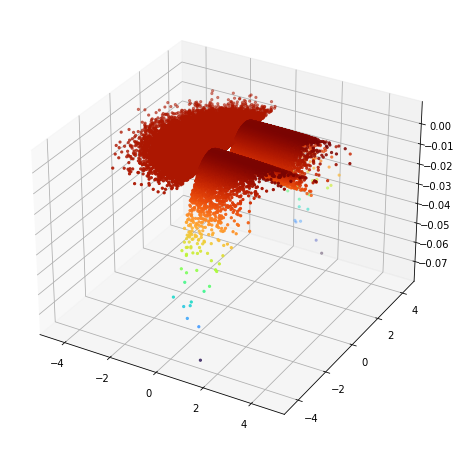

In [4]:
unit = np.array(np.zeros(N), order='F');
unit[22] = 1
Tunit = FMCA.inverseSampletTransform(ST, unit)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(spts[0,:], spts[1,:], Tunit[:,0], c=Tunit[:,0], marker='.', cmap='turbo')
plt.show()

In [5]:
cov = FMCA.CovarianceKernel("gaussian", 10)
start = time.time()
K = FMCA.sampletCompressKernel(cov, ST, pts, 0.8, 1e-4)
stop = time.time()
print('elapsed time samplet compressor: ', stop - start, 'sec.')

dtilde: 3 mpdeg: 4 eta: 8.00e-01 threshold: 1.00e-04
elapsed time samplet compressor:  12.050703287124634 sec.


In [7]:
Chol = FMCA.PivotedCholesky(cov, spts, 1e-6)

N: 100000 max number of cols: 2500 rel tol: 1.00e-01 initial trace: 1.00e+05
steps: 62 trace error: 9.96e-02
